# Home Work 1


In this notebook we want to work with these kinds of Regression:


1.   Linear Regression
2.   Polynomial Regression degree 3
3.   Polynomial Regression degree 5



In [ ]:
import numpy as np
import zipfile
import matplotlib.pyplot as plt

# np.random.seed(0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load dataset

In [3]:
data_path = '/content/drive/MyDrive/ML/HW1/data.npz'
data = np.load(data_path)
print(f'type of data : {type(data)}')

type of data : <class 'numpy.lib.npyio.NpzFile'>


In [ ]:
print(f"y : {data['y']}")
print(f"type of y : {type(data['y'])}")
print(f"shape of y : {data['y'].shape}")

y : [7.57725958e+03 3.36607347e+03 4.13489222e+03 ... 4.38371031e+00
 9.67416840e+03 4.54442369e+03]
type of y : <class 'numpy.ndarray'>
shape of y : (8000,)


In [ ]:
data['y'][0]

7577.259577373756

Let's define a function to extract out data in npz file.

In [ ]:
def npz_headers(npz):
    """Takes a path to an .npz file, which is a Zip archive of .npy files.
    Generates a sequence of (name, shape, np.dtype).
    """
    with zipfile.ZipFile(npz) as archive:
        for name in archive.namelist():
            if not name.endswith('.npy'):
                continue

            npy = archive.open(name)
            version = np.lib.format.read_magic(npy)
            shape, fortran, dtype = np.lib.format._read_array_header(npy, version)
            yield name[:-4], shape, dtype

In [ ]:
print(f'name , shape, type')
print("-"*20)

for i in npz_headers(data_path):
  print(i)

name , shape, type
--------------------
('y', (8000,), dtype('float64'))
('x2', (8000,), dtype('float64'))
('x2_test', (2000,), dtype('float64'))
('x1', (8000,), dtype('float64'))
('y_test', (2000,), dtype('float64'))
('x1_test', (2000,), dtype('float64'))


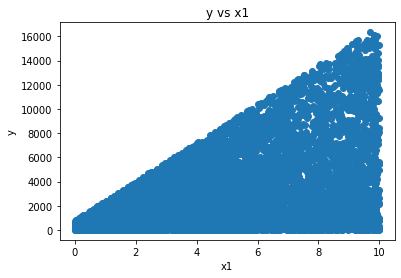

In [ ]:
plt.scatter(data['x1'],data['y'])
plt.xlabel('x1')
plt.ylabel('y')
plt.title('y vs x1')
plt.show()

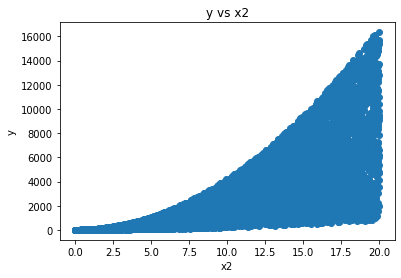

In [ ]:
plt.scatter(data['x2'],data['y'])
plt.xlabel('x2')
plt.ylabel('y')
plt.title('y vs x2')
plt.show()

## Normal Equation: the closed-form solution for regression

### Required Functions

در این قسمت تابع های مورد نیاز را تعریف می کنیم. می شد برای تمیز شدن کار و کم کردن تعداد تابع ها، تابع ایگرگ 
هت را جدا ننویسم و یکباره فانکشن خطا رو بنویسیم.

In [4]:
def transform(x1, x2, degree):
  '''create X matrix base on degree'''
  
  # reshape x1 and x2 in order to concatenate them to create matrix X
  x1 = x1.reshape(-1,1)
  x2 = x2.reshape(-1,1)

  X = np.concatenate((x1, x2), axis=1)

  for i in range(2, degree+1):
    X = np.append(X, x1**i ,axis=1) 
    X = np.append(X, x2**i ,axis=1) 
  
  n = X.shape[0]# Number of training examples
  # Appending a cloumn of ones in X to add the bias term.
  X = np.append(np.ones((n,1)), X, axis=1)
  return X


def find_theta(X, y):
  '''calculate theta based on Normal Equation.'''
      
  # reshaping y to (n,1)
  y = y.reshape(-1,1)
    
  # The Normal Equation
  theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    
  return theta


def y_hat(X, theta):
  '''Calculate y hat(estimation of y)'''   

  y_hat = np.dot(X, theta)
  return y_hat


def loss(y, y_hat):
  '''calculate SSE(Sum of Squared Error)'''
    
  # y --> true/target value.
  # y_hat --> hypothesis
  y = y.reshape(-1,1) # convert 1d array into 2d array

  loss = np.sum((y_hat - y)**2)
  return loss


### Linear Regression

In this section we want to find W in the below equation:

w = [w0,
     w1,
     w2]


```
y = w0 + w1*x1 + w2*x2
```




Let's take a look at our dataset.

In [ ]:
data['x1']

array([7.26500031, 2.35696349, 2.47430862, ..., 0.52292493, 9.43143619,
       9.00905255])

In [ ]:
data['x2']

array([15.5955649 , 17.14186901, 18.6237142 , ...,  0.66600689,
       15.58160739, 10.89676069])

In [ ]:
print(f"shape of data[x1] : {data['x1'].shape}")

shape of data[x1] : (8000,)


In [ ]:
# create X_train from x1 and x2
X_train = transform(data['x1'], data['x2'], 1)

print(f'X_train shape : {X_train.shape}')
print(f'type of X_train : {type(X_train)}')
print(f'X_train : \n{X_train}')

X_train shape : (8000, 3)
type of X_train : <class 'numpy.ndarray'>
X_train : 
[[ 1.          7.26500031 15.5955649 ]
 [ 1.          2.35696349 17.14186901]
 [ 1.          2.47430862 18.6237142 ]
 ...
 [ 1.          0.52292493  0.66600689]
 [ 1.          9.43143619 15.58160739]
 [ 1.          9.00905255 10.89676069]]


In [ ]:
# calculate W for linear regression
w_linear = find_theta(X_train, data['y'])

print(f'w for linear regression : \n{w_linear}')

w for linear regression : 
[[-4226.07005149]
 [  537.30127365]
 [  446.63582426]]


In [ ]:
# calculate y_hat for X_train
y_hat_train = y_hat(X_train, w_linear)

print(f'y_hat_train for linear regression : \n{y_hat_train}')

y_hat_train for linear regression : 
[[ 6642.96184932]
 [ 4696.50222523]
 [ 5421.39706534]
 ...
 [-3647.63928447]
 [ 7800.75668628]
 [ 5481.38905149]]


In [ ]:
# calculate SSE (Sum of Squared Error) on the Train data
train_loss = loss(data['y'], y_hat_train)
print(f'SSE on Train : {train_loss}')

SSE on Train : 18317759690.36797


Let's take a look at the test set.

In [ ]:
data['x1_test']

array([10.77423209,  2.79057964,  5.23180031, ..., 10.08920164,
        7.82967696,  4.87519541])

In [ ]:
data['x2_test']

array([19.81394021, 16.7197032 , 16.92410388, ...,  5.49741639,
       12.89698883, 19.93349456])

In [ ]:
# calculate X_test form x1_test and x2_test
X_test = transform(data['x1_test'], data['x2_test'], 1)

print(f'X_test shape : {X_test.shape}')
print(f'type of X : {type(X_test)}')
print(f'X_test : \n{X_test}')

X_test shape : (2000, 3)
type of X : <class 'numpy.ndarray'>
X_test : 
[[ 1.         10.77423209 19.81394021]
 [ 1.          2.79057964 16.7197032 ]
 [ 1.          5.23180031 16.92410388]
 ...
 [ 1.         10.08920164  5.49741639]
 [ 1.          7.82967696 12.89698883]
 [ 1.          4.87519541 19.93349456]]


In [ ]:
# calculate y_hat for X_test
y_hat_test = y_hat(X_test, w_linear)

print(f'y_hat_test for linear regression : \n{y_hat_test}')

y_hat_test for linear regression : 
[[10412.55408876]
 [ 4740.93036483]
 [ 6143.89400245]
 ...
 [ 3650.21394141]
 [ 5741.08258713]
 [ 7296.39142551]]


In [ ]:
# calculate SSE (Sum of Squared Error) on the Test data
test_loss = loss(data['y_test'], y_hat_test)
print(f'SSE on Test : {test_loss}')

SSE on Test : 12944759955.771984


### Polynomial Regression degree 3

In this section, we want to find W in the below equation:

w = [w0, w1, w2, w3, w4, w5, w6]

```
y = w0 + w1*x1 + w2*x2 + w3*(x1**2) + w4*(x2**2) + w5*(x1**3) + w6*(x2**3)
```



In [ ]:
# Calculate X_train for above equation
X_train = transform(data['x1'], data['x2'], 3)

print(f'X_train shape : {X_train.shape}')
print(f'X_train : \n{X_train}')

X_train shape : (8000, 7)
X_train : 
[[1.00000000e+00 7.26500031e+00 1.55955649e+01 ... 2.43221645e+02
  3.83448383e+02 3.79317894e+03]
 [1.00000000e+00 2.35696349e+00 1.71418690e+01 ... 2.93843673e+02
  1.30935848e+01 5.03702975e+03]
 [1.00000000e+00 2.47430862e+00 1.86237142e+01 ... 3.46842731e+02
  1.51482200e+01 6.45949989e+03]
 ...
 [1.00000000e+00 5.22924926e-01 6.66006895e-01 ... 4.43565184e-01
  1.42994071e-01 2.95417471e-01]
 [1.00000000e+00 9.43143619e+00 1.55816074e+01 ... 2.42786489e+02
  8.38945004e+02 3.78300375e+03]
 [1.00000000e+00 9.00905255e+00 1.08967607e+01 ... 1.18739394e+02
  7.31201983e+02 1.29387476e+03]]


In [ ]:
# calculate W for polynoimial regression
w_degree3 = find_theta(X_train, data['y'])

print(f'w for polynomial regression degree 3 : \n{w_degree3}')

w for polynomial regression degree 3 : 
[[-2.79586683e+03]
 [ 5.40646416e+02]
 [ 5.52465064e+01]
 [-3.10749259e+00]
 [ 1.53636772e+01]
 [ 2.54416248e-01]
 [ 2.30471714e-01]]


In [ ]:
# calculate y_hat for X_train
y_hat_train = y_hat(X_train, w_degree3)

print(f'y_hat for polynomial regression degree 3 : \n{y_hat_train}')

y_hat for polynomial regression degree 3 : 
[[ 6538.07063228]
 [ 5086.92586227]
 [ 6373.09541536]
 ...
 [-2470.28527678]
 [ 7703.02690866]
 [ 4733.14450239]]


همانطور که می بینیم مدل با درجه 3 روی داده های آموزشی بهتر از مدل خطی فیت شده است و خطای دادهای آموزشی آن نسبت به مدل خطی کمتر شده است.

In [ ]:
# calculate SSE on the Train data
train_loss = loss(data['y'], y_hat_train)
print(f'SSE on Train : {train_loss}')

SSE on Train : 14817860486.598677


In [ ]:
# calculate X_test form x1_test and x2_test for degree 3 regreesion
X_test = transform(data['x1_test'], data['x2_test'], 3)

print(f'X_test shape : {X_test.shape}')
print(f'X_test : \n{X_test}')

X_test shape : (2000, 7)
X_test : 
[[1.00000000e+00 1.07742321e+01 1.98139402e+01 ... 3.92592227e+02
  1.25071679e+03 7.77879891e+03]
 [1.00000000e+00 2.79057964e+00 1.67197032e+01 ... 2.79548475e+02
  2.17311778e+01 4.67396753e+03]
 [1.00000000e+00 5.23180031e+00 1.69241039e+01 ... 2.86425292e+02
  1.43203449e+02 4.84749140e+03]
 ...
 [1.00000000e+00 1.00892016e+01 5.49741639e+00 ... 3.02215869e+01
  1.02699991e+03 1.66140647e+02]
 [1.00000000e+00 7.82967696e+00 1.28969888e+01 ... 1.66332321e+02
  4.79989274e+02 2.14518608e+03]
 [1.00000000e+00 4.87519541e+00 1.99334946e+01 ... 3.97344205e+02
  1.15871355e+02 7.92045856e+03]]


In [ ]:
# calculate y_hat for X_test
y_hat_test = y_hat(X_test, w_degree3)

print(f'y_hat_test for polynomial regression degree 3 : \n{y_hat_test}')

y_hat_test for polynomial regression degree 3 : 
[[11905.75972022]
 [ 4989.99475939]
 [ 6436.81606587]
 ...
 [ 3410.10996194]
 [ 5131.23016463]
 [ 8826.87792273]]


خطا روی داده های تست نیز در این مدل نسبت به مدل خطی قبل کمتر شده است و نشان دهنده ی این است که مدل بهتر یاد گرفته و خطا روی داده های تست نسبت به خطا در داده های آموزشی در مدل 3 کمتر است که نشان دهنده تعمیم پذیر بودن مدل است.

In [ ]:
# Calculate SSE on the Test data
test_loss = loss(data['y_test'], y_hat_test)
print(f'SSE on Test : {test_loss}')

SSE on Test : 9750669747.48017


### Polynomial Regression degree 5

In this section, we want to find W in the below equation:

w = [w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10]

```
y = w0 + w1*x1 + w2*x2 + w3*(x1**2) + w4*(x2**2) + w5*(x1**3) + w6*(x2**3) + w7*(x1**4) + w8*(x2**4) + w9*(x1**5) + w10*(x2**5)
```


In [ ]:
# Calculate X_train for above equation
X_train = transform(data['x1'], data['x2'], 5)

print(f'X_train shape : {X_train.shape}')
print(f'X_train : \n{X_train}')

X_train shape : (8000, 11)
X_train : 
[[1.00000000e+00 7.26500031e+00 1.55955649e+01 ... 5.91567684e+04
  2.02384936e+04 9.22583221e+05]
 [1.00000000e+00 2.35696349e+00 1.71418690e+01 ... 8.63441042e+04
  7.27384887e+01 1.48009932e+06]
 [1.00000000e+00 2.47430862e+00 1.86237142e+01 ... 1.20299880e+05
  9.27404803e+01 2.24043058e+06]
 ...
 [1.00000000e+00 5.22924926e-01 6.66006895e-01 ... 1.96750072e-01
  3.91017971e-02 1.31036905e-01]
 [1.00000000e+00 9.43143619e+00 1.55816074e+01 ... 5.89452792e+04
  7.46258264e+04 9.18462199e+05]
 [1.00000000e+00 9.00905255e+00 1.08967607e+01 ... 1.40990436e+04
  5.93465669e+04 1.53633904e+05]]


In [ ]:
# calculate W for polynoimial regression
w_degree5 = find_theta(X_train, data['y'])

print(f'w for polynomial regression degree 5 : \n{w_degree5}')

w for polynomial regression degree 5 : 
[[-2.61174690e+03]
 [ 4.70895119e+02]
 [-6.93858556e+01]
 [ 1.95318188e+00]
 [ 4.25679451e+01]
 [ 7.47825237e+00]
 [-1.76837453e+00]
 [-1.55741946e+00]
 [ 4.14209025e-02]
 [ 8.60639285e-02]
 [ 3.04907069e-04]]


In [ ]:
# calculate y_hat for X_train
y_hat_train = y_hat(X_train, w_degree5)

print(f'y_hat for polynomial regression degree 5 : \n{y_hat_train}')

y_hat for polynomial regression degree 5 : 
[[ 6478.3402438 ]
 [ 5004.40623146]
 [ 6343.63795629]
 ...
 [-2391.85777433]
 [ 7662.25426696]
 [ 4746.60202232]]


همانطور که می بنیم خطای مدل با درجه 5 روی داده های آموزشی نسبت به خطای مدل با درجه 3  کمتر است (حدود 21 میلیون)و توانسته بهتر روی داده های آموزشی فیت شود.




In [ ]:
# calculate SSE on the Train data
train_loss = loss(data['y'], y_hat_train)
print(f'SSE on Train : {train_loss}')

SSE on Train : 14796048788.33801


In [ ]:
# calculate X_test form x1_test and x2_test for degree 5 regreesion
X_test = transform(data['x1_test'], data['x2_test'], 5)

print(f'X_test shape : {X_test.shape}')
print(f'X_test : \n{X_test}')

X_test shape : (2000, 11)
X_test : 
[[1.00000000e+00 1.07742321e+01 1.98139402e+01 ... 1.54128656e+05
  1.45188304e+05 3.05389598e+06]
 [1.00000000e+00 2.79057964e+00 1.67197032e+01 ... 7.81473500e+04
  1.69227956e+02 1.30660050e+06]
 [1.00000000e+00 5.23180031e+00 1.69241039e+01 ... 8.20394480e+04
  3.91972677e+03 1.38844414e+06]
 ...
 [1.00000000e+00 1.00892016e+01 5.49741639e+00 ... 9.13344316e+02
  1.04540365e+05 5.02103401e+03]
 [1.00000000e+00 7.82967696e+00 1.28969888e+01 ... 2.76664409e+04
  2.94251863e+04 3.56813780e+05]
 [1.00000000e+00 4.87519541e+00 1.99334946e+01 ... 1.57882418e+05
  2.75397593e+03 3.14714831e+06]]


In [ ]:
# calculate y_hat for X_test
y_hat_test = y_hat(X_test, w_degree5)

print(f'y_hat_test for polynomial regression degree 5 : \n{y_hat_test}')

y_hat_test for polynomial regression degree 5 : 
[[12446.65510582]
 [ 4909.85681766]
 [ 6414.32258878]
 ...
 [ 3528.56591712]
 [ 5110.67043418]
 [ 8978.04169485]]


خطا روی داده های تست در این مدل نسبت به مدل قبلی کمتر شده است اما همچنان خطا خیلی زیاد است و این احتمالا به این دلیل است که در مدل های درجه 3 و درجه 5 ما رابطه ی بین متغیرها را در مدل در نظر نگرفته ایم. اگر این رابطه را نیز در نظر می گرفتیم به نتیجه بهتری می رسیدیم. اما این نتیجه نشان می دهد مدل با درجه 3و درجه 5 خطای کمتری نسبت به مدل با درجه1 دارند.

In [ ]:
# Calculate SSE on the Test data
test_loss = loss(data['y_test'], y_hat_test)
print(f'SSE on Test : {test_loss}')

SSE on Test : 9201143521.590874


### Model Comparision

در این قسمت هدف مقایسه مدل ها است تا ببینیم مدل با چه درجه ای بر حسب خطا روی داده های آموزشی و تست برای داده ها ی مناسب است.
همانطور که میبینیم خطا روی داده آموزشی برای مدل خطی در حدود 18 میلیارد است!!!!

این به این دلیل است که مدلی که  ما انتخاب کردیم بیش از اندازه برای داده های ما ساده است و نتوانسته داده های آموزشی رو به خوبی یاد بگیرد و طبعا خطا برای داده های تست نیز بالا هست و در حد13 میلیارد است.

اما در مدل درجه سه و درجه پنج خطا روی داده های آموزشی و همچنین داده های تست نسبت به مدل خطی کاهش می یابد. زیرا مدل نسبت به مدل خطی پیچیده تر می شود و قابلیت یادگیری مدل افزایش پیدا می کند و بهتر داده ها را یاد می گیرد اما همچنان خطا زیاد است. یعنی خطا در حد 3 میلیار کاهش یافته است. دلیل این خطای بالا در مدل درجه 3 و درجه 5 این است که ما در این مدل ها روابط بین متغیرها و ویژگی ها را در نظر نگرفتیم. مثلا در مدل درجه سه می شد برای ایکس یک و ایکس دو نیز ضریبی در نظر گرفت و بین توان های مختلف آن ها. اگر این کار انجام میشد مدل پبچیده تر این میشد و قابلیت یادگیری بیشتری داشت و در نتیجه خطا روی داده ها کاهش می یافت. البته در درجه های  بالاتر مثلا درجه5 و بالاتر باید به این موضوع توجه داشت که مدل زیاد پیچیده نشود در حدی که داده ها را به همراه نویز حفظ کند و یادگیری نداشته باشد چون در این صورت خطا روی داده های دیده نشده یعنی داده های تست افزایش می یابد که این مطلوب ما نیست.

In [ ]:
train_loss = [18317759690.36797, 14817860486.598677, 14796048788.33801]
test_loss = [12944759955.771984 ,9750669747.48017, 9201143521.590874]
regressor = ['linear', 'degree3', 'degree5']

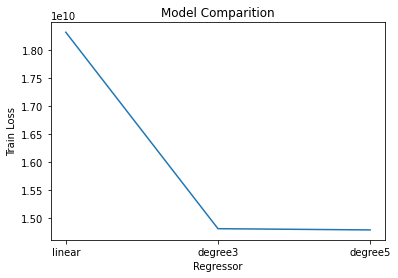

In [ ]:
plt.plot(regressor ,train_loss)
plt.xlabel('Regressor')
plt.ylabel('Train Loss')
plt.title("Model Comparition")
plt.show()

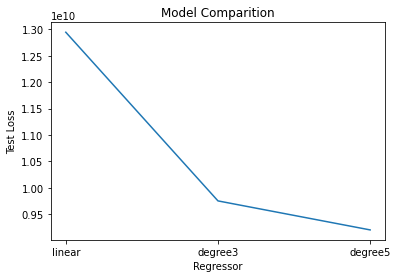

In [ ]:
plt.plot(regressor ,test_loss)
plt.xlabel('Regressor')
plt.ylabel('Test Loss')
plt.title("Model Comparition")
plt.show()

همانطور که در نمودار های بالا مشاهده می کنیم طبق نتایج بدست آمده مدل با درجه 5 عملکرد بهتری تسبت به بقیه هم روی داده های آموزشی و هم روی داده های تست دارد و توانسته داده ها و الگوهای موجود در آنها را بهتر از بقیه یاد بگیرد.

## Gradient Descent

### Gradient Descent Function

در این قسمت هدف این است تا ضرایب معادله های رگرسیون را به جای معادله نرمال ،با استفاده از گرادیان کاهشی بدست آوریم. معادله نرمال در یک گام ما را به ضرایب بهینه می رساند و نیازی به انتخب ضرایب رندوم اولیه ندارد و روش راحت تری است اما ایرادی که دارد این است که گاهی تعداد ویژگی ها بیشتر از تعداد داده های آموزشی هستند در این صورت ماتریس ویژگی ها، منفرد(سینگیولار) می شود که در اینصورت امکان محاسبه معکوس در معادله نرمال نیست. همچنین اگر تعداد داده ها نیز زیاد باشد برای محاسبه ضرب ماتریسی عملیات خیلی زیادی باید انجام شود و تعداد بیت زیادی از حافظه را اشغال می کند. 

برای رفع این ایرادها ، یک روش دیگر برای بدست آوردن ضرایب بهینه وجود دارد که روش تکراری است و گرادیان کاهشی نام دارد. در این روش در هر تکرار ضرایب ما بر اساس نرخ یادگیری و مقدار تفاوت خروجی بدست آمده با ضریب فعلی و خروجی هدف، آپدیت می شود. این روند ادامه دارد تا به شرط توقف برسیم. در تابع زیر ما شرط توقف را تعداد ایپاک گرفته ایم اما می توان کاهش خطا را نیز به عنوان شرط توقف در نظر گرفت.

In [5]:
def gradient_descent1(X, y, theta, alpha, epoch):
  '''Calculate gradient descent to achieve min J'''
  # because y in one dim array
  y = y.reshape(-1,1)
  # history of cost values
  J = []
  iter = 0
  
  #y_hat with initial theta
  y_hat_train = y_hat(X, theta)
  J.append(loss(y, y_hat_train))

  while iter < epoch:

    # gradient descent function in vectorized form
    error = y - y_hat_train
    theta = theta + alpha*np.dot(X.T, error)

    y_hat_train = y_hat(X, theta)
    j = loss(y, y_hat_train)
    J.append(j)

    print(f'loss functon : iter {iter} ==> {j}')
    iter += 1
    
  return J, theta


تابع زیر تابع گرادیان کاهشی است اما شرط توقف آن بر اساس عدم کاهش تابع خطا هست.

In [6]:
def gradient_descent2(X, y, theta, alpha):
  '''Calculate gradient descent to achieve min J
  In this function we have stop conditon on decreasing loss function
  '''
  # because y in one dim array
  y = y.reshape(-1,1)
  # history of cost values
  J = []
  iter = 0
  
  #y_hat with initial theta
  y_hat_train = y_hat(X, theta)
  J.append(loss(y, y_hat_train))

  stop_condition = False

  while not stop_condition:

    # gradient descent function in vectorized form
    error = y - y_hat_train
    theta = theta + alpha*np.dot(X.T, error)

    y_hat_train = y_hat(X, theta)
    j = loss(y, y_hat_train)
    
    if j >= J[-1]:
      stop_condition = True

    J.append(j)

    print(f'loss functon : iter {iter} ==> {j}')
    iter += 1
    
  return J, theta

### Linear Regression

چون در این قسمت باید وزن ها به صورت اولیه و رندم انتخاب شوند ما یک سید را انتخاب می کنیم تا برای هر بار اجرای نوت بوک نتیجه یکسانی بگیریم

In [7]:
np.random.seed(0)

#### Experiment 1

In [ ]:
# Initialize w_linear on normal distribution
w_linear = np.random.normal(0, 1, 3)

print(f'w_linear shape : {w_linear.shape}')
print(f'w_linear with GD : {w_linear}')

w_linear shape : (3,)
w_linear with GD : [1.76405235 0.40015721 0.97873798]


دراین قسمت باید ماتریس داده ها را درست کنیم و سپس یک وزن اولیه رو از توزیع رندوم ست کنیم. سپس نرخ یادگیری و تعداد ایپاک ها رو مشخص می کنیم و گرادیان کاهشی را اجرا می کنیم. ابتدا این آزمایش رو برای نرخ یادگیری 0.001 و تعداد تکرار 10 در نظر می گیریم. مشاهده می کنیم تابع خطا روی داده های آموزشی به شدت افزایش می یابد. سپس تعداد تکرار رو به 100 افزایش می دهیم تا شاید با افزایش تکرار خطا کاهش پیدا کند اما می بینیم که خطا به سمت بی نهایت می رود و وزن نهایی خالی می ماند و قادر به محاسبه آن نیست. سپس نرخ یادگیری را کاهش می دهیم تا از واگرایی آن کمتر شود و به 0.0001 کاهش می دهیم اما مشاهده می کنیم که باز واگرا می شویم و در نهایت با 100 تکرار به بی نهایت می رویم.
همچنینن با نرخ یادگیری 0.00001 نیز واگرا می شویم.
به این نتیجه می رسیم که برای اینکه واگرا نشویم و مقدار خطای ما کاهش پیدا کند باید نرخ یادگیری را خیلی کم کنیم. با کم کردن نرخ یادگیری تغییراتی که در خطا صورت می گیرد کم می شود و پس باید تعداد ایپاک ها را زیادتر کنیم و با تعداد تکرار بیشتری به جواب مورد نظرمان می رسیم.

لازم به ذکر است که در اینجا ما شرط توقف گرادیان کاهشی رو برابر با تعداد ایپاک در نظر گرفته ایم و هدفمان این است تا به خطایی نزدیک به خطایی که با روش  معادله بسته رسیده بودیم برسیم.

در بین نرخ یادگیری های لیست زیر، 0.000001 بهترین نتیجه رو به ما می دهد و همگرا می شود. ما این نرخ یادگیری رو به همراه 400 ایپاک امتحان کردیم که درایپاک های آخر کاهش که در خطای داده آموزشی کم میشود.

alpha = [0.001, 0.0001, 0.00001, 0.000001]

In [ ]:
X_train = transform(data['x1'], data['x2'], 1)
w_linear = w_linear.reshape(-1, 1)

alpha = 0.000001
epoch = 400

In [ ]:
J, theta = gradient_descent1(X_train, data['y'], w_linear, alpha, epoch)

loss functon : iter 0 ==> 45277198672.86505
loss functon : iter 1 ==> 38984484597.16259
loss functon : iter 2 ==> 38558207963.35896
loss functon : iter 3 ==> 38464602118.71813
loss functon : iter 4 ==> 38395044258.619125
loss functon : iter 5 ==> 38331324504.2843
loss functon : iter 6 ==> 38271569178.15379
loss functon : iter 7 ==> 38214980340.93893
loss functon : iter 8 ==> 38160955416.127625
loss functon : iter 9 ==> 38109011785.728
loss functon : iter 10 ==> 38058761270.55078
loss functon : iter 11 ==> 38009891551.40056
loss functon : iter 12 ==> 37962151331.05862
loss functon : iter 13 ==> 37915338403.33217
loss functon : iter 14 ==> 37869290055.112854
loss functon : iter 15 ==> 37823875344.9914
loss functon : iter 16 ==> 37778988891.51686
loss functon : iter 17 ==> 37734545875.941765
loss functon : iter 18 ==> 37690478022.00349
loss functon : iter 19 ==> 37646730361.7169
loss functon : iter 20 ==> 37603258633.50166
loss functon : iter 21 ==> 37560027189.01342
loss functon : iter 2

همانطور که میبینیم خطایی که در نهایت روی داده های آموزشی با 400 تکرار و نرخ یادگیری ذکر شده بهش می رسیم در حد 20 میلیارد است که خیلی زیاد تر از چیزی است که در قسمت قبل بدست آوریم. برای اینک خطا کمتر شود احتمالا باید تعداد تکرار ها را بیشتر کنیم تا به چیزی که در قسمت قبل رسیده بودیم برسیم.

In [ ]:
print(f'SSE on Train : {J[-1]}')

SSE on Train : 26651708349.78143


In [ ]:
theta.shape

(3, 1)

باید هنوز ایپاک رو بیشتر بگیرم هنوز نزدیک نشده

In [ ]:
theta 

array([[-1493.86515235],
       [  300.03796353],
       [  330.12705238]])

در ابتدا خطای مدل خیلی زیاد بوده در حد 160 میلیارد، زیرا وزن به صورت رندوم انتخاب شده بود. رفته رفته با آپدیت شدن وزن و نزدیک شدن به نقطه بهینه برای ضرایب این خطا نیز کم می شود. اما باز هم خطا خیلی زیاد است و در بالا دیدیم که ضرایب به ضرایبی که در فرم بسته بدست آوریم نزدیک نشده اند پس هنوز تعداد ایپاک بیشتری نیاز است.

همچنین بنظر می رسد نرخ یاگیری انتخاب شده برای این معادله زیاد باشد. 
زیرا خطا به یک بازه کاهش پیدا کرده و نمودار تیز شده است.
اگر نرخ یادگیری به درستی انتخاب شده باشد، نمودار کاهش خطا بر حسب تعداد تکرار باید شیب ملایم تری داشته باشد و به صورت زیر باشد.


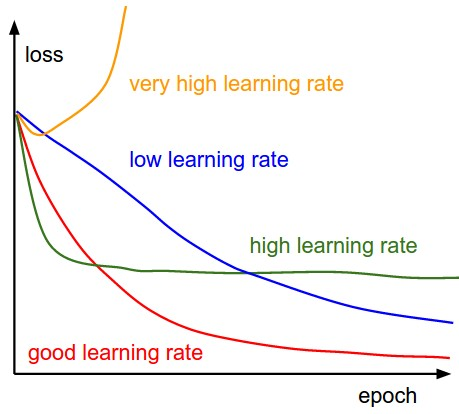

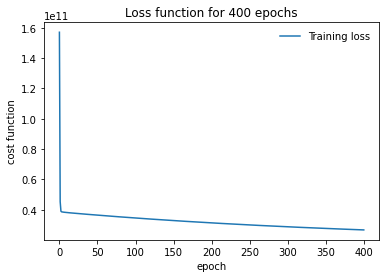

In [ ]:
plt.plot(J, label='Training loss')
plt.xlabel('epoch')
plt.ylabel('cost function')
plt.legend(frameon=False)
plt.title(f"Loss function for {epoch} epochs")
plt.show()

In [ ]:
# set the last theta as w_linear
w_linear_GD = theta

X_test = transform(data['x1_test'], data['x2_test'], 1)

# calculate y_hat for X_test
y_hat_test = y_hat(X_test, w_linear_GD)

# Calculate SSE on the Test data
test_loss = loss(data['y_test'], y_hat_test)
print(f'SSE on Test : {test_loss}')

SSE on Test : 19877459300.489796


#### Experiment2

همانطور که در آزمایش زیر می بینیم، در این قسمت نرخ یادگیری تغییر نکرده اما تعداد تکرارها را از 400 به 2000 افزایش دادیم که میبینیم خطا خیلی بهتر شده و کمتر شده . هم خطا روی داده های آموزشی کمتر شده و هم روی داده های تست. همچنین تتایی (بردار ضرایب) که در نهایت بدست می آید به بردار ضرایبی که با معادله نرمال بدست آوردیم نزدیک تر شده است.

اگر بخواهیم شیب نمودار را ملایم تر بکنیم باید نرخ یادگیری را کمتر بکنیم خیلی ، که اینکار باعث می شود تغییراتی که روی خطا ایجاد می شود کم کم اعمال شود و در نتیجه تعداد ایپاک به شدت بیشتری نیاز دارد. مثلا من همین آزمایش را با نرخ یادگیری 0.00000001 و تعداد تکرار 20000انجام دادم که ده برابر تعداد تکرار فعلی است ولی در نهایت به خطای حدود 30 میلیارد روی داده های آموزشی رسیدم که خوب نبود و در واقع هنوز هم نیاز به تکرار داشت.

نتیجه : هرچقدر نرخ یادگیری کمتر شود تعداد ایپاک بیشتری برای رسیدن به ضرایب بهینه نیاز هست . 

In [ ]:
alpha = 0.000001
epoch = 2000

J, theta = gradient_descent1(X_train, data['y'], w_linear, alpha, epoch)

loss functon : iter 0 ==> 45277198672.86505
loss functon : iter 1 ==> 38984484597.16259
loss functon : iter 2 ==> 38558207963.35896
loss functon : iter 3 ==> 38464602118.71813
loss functon : iter 4 ==> 38395044258.619125
loss functon : iter 5 ==> 38331324504.2843
loss functon : iter 6 ==> 38271569178.15379
loss functon : iter 7 ==> 38214980340.93893
loss functon : iter 8 ==> 38160955416.127625
loss functon : iter 9 ==> 38109011785.728
loss functon : iter 10 ==> 38058761270.55078
loss functon : iter 11 ==> 38009891551.40056
loss functon : iter 12 ==> 37962151331.05862
loss functon : iter 13 ==> 37915338403.33217
loss functon : iter 14 ==> 37869290055.112854
loss functon : iter 15 ==> 37823875344.9914
loss functon : iter 16 ==> 37778988891.51686
loss functon : iter 17 ==> 37734545875.941765
loss functon : iter 18 ==> 37690478022.00349
loss functon : iter 19 ==> 37646730361.7169
loss functon : iter 20 ==> 37603258633.50166
loss functon : iter 21 ==> 37560027189.01342
loss functon : iter 2

In [ ]:
print(f'SSE on Train : {J[-1]}')

SSE on Train : 18559229403.574776


In [ ]:
theta 

array([[-3760.99912743],
       [  496.91474666],
       [  426.80391406]])

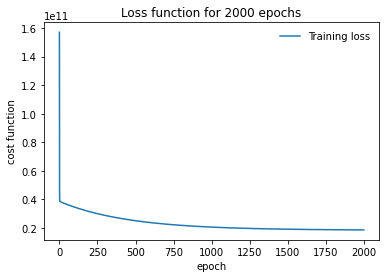

In [ ]:
plt.plot(J, label='Training loss')
plt.xlabel('epoch')
plt.ylabel('cost function')
plt.legend(frameon=False)
plt.title(f"Loss function for {epoch} epochs")
plt.show()

In [ ]:
# set the last theta as w_linear
w_linear_GD = theta

X_test = transform(data['x1_test'], data['x2_test'], 1)

# calculate y_hat for X_test
y_hat_test = y_hat(X_test, w_linear_GD)

# Calculate SSE on the Test data
test_loss = loss(data['y_test'], y_hat_test)
print(f'SSE on Test : {test_loss}')

SSE on Test : 13774272327.417976


همانطور که می بینیم خطا روی داده های تست نیز نسبت به آزمایش قبلی کاهش یافته و هنوز هم اگر چند ایپاک دیگر با احتیاط به اینکه دچار بیش برازش نشویم ادامه دهیم به خطای کمتری خواهیم رسید.

#### Expriment 3

این آزمایش را یا گرادیان کاهشی که شراط توقف آن بر اساس عدم کاهش خطا هست انجام می دهیم تا ببینیم چند تکرار لازم دارد تا به کمترین خطا برسیم.

In [ ]:
alpha = 0.000001

J, theta = gradient_descent2(X_train, data['y'], w_linear, alpha)

Streaming output truncated to the last 5000 lines.
loss functon : iter 8348 ==> 18317759880.884834
loss functon : iter 8349 ==> 18317759880.463623
loss functon : iter 8350 ==> 18317759880.04334
loss functon : iter 8351 ==> 18317759879.623985
loss functon : iter 8352 ==> 18317759879.20556
loss functon : iter 8353 ==> 18317759878.78806
loss functon : iter 8354 ==> 18317759878.371483
loss functon : iter 8355 ==> 18317759877.955826
loss functon : iter 8356 ==> 18317759877.541092
loss functon : iter 8357 ==> 18317759877.127274
loss functon : iter 8358 ==> 18317759876.714363
loss functon : iter 8359 ==> 18317759876.302372
loss functon : iter 8360 ==> 18317759875.891293
loss functon : iter 8361 ==> 18317759875.481117
loss functon : iter 8362 ==> 18317759875.071854
loss functon : iter 8363 ==> 18317759874.66349
loss functon : iter 8364 ==> 18317759874.256035
loss functon : iter 8365 ==> 18317759873.84948
loss functon : iter 8366 ==> 18317759873.443817
loss functon : iter 8367 ==> 18317759873.0

همانطور که می بینیم بعد از 13348 ایپاک به خطای بهینه می رسیم و همچنین ضرایبی که در نهایت بدست می آید خیلی نزدیک به ضرایبی است که با معالدله نرمال بدست آمده و تفاوت خیلی کمی با آن دارد.

در مورد خطا های آموزشی و تست هم میبنیم که نسبت به آزمایش های قبلی کاهش یافته و به خطایی که با فرم نرمال بدست آوردیم نزدیک شده.

In [ ]:
print(f'SSE on Train : {J[-1]}')

SSE on Train : 18317759690.370956


In [ ]:
theta

array([[-4226.06841682],
       [  537.30113169],
       [  446.63575455]])

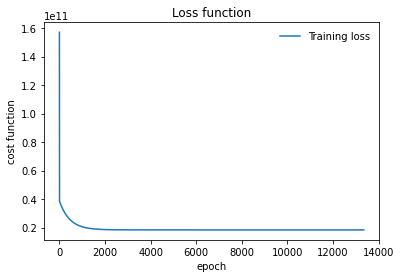

In [ ]:
plt.plot(J, label='Training loss')
plt.xlabel('epoch')
plt.ylabel('cost function')
plt.legend(frameon=False)
plt.title(f"Loss function")
plt.show()

In [ ]:
# set the last theta as w_linear
w_linear_GD = theta

X_test = transform(data['x1_test'], data['x2_test'], 1)

# calculate y_hat for X_test
y_hat_test = y_hat(X_test, w_linear_GD)

# Calculate SSE on the Test data
test_loss = loss(data['y_test'], y_hat_test)
print(f'SSE on Test : {test_loss}')

SSE on Test : 12944762618.64016


### Polynomial Regression degree 3

#### Experiment 1

In [ ]:
# Initialize w_degree3 on normal distribution. we need 7 coefficients.
w_degree3 = np.random.normal(0, 1, 7)

print(f'w_degree3 shape : {w_degree3.shape}')
print(f'w_degree3 with GD : {w_degree3}')

w_degree3 shape : (7,)
w_degree3 with GD : [ 2.2408932   1.86755799 -0.97727788  0.95008842 -0.15135721 -0.10321885
  0.4105985 ]


در اینجا با نرخ یادگیری 0.001و تعداد تکرار 100 در تکرار 19 ام به بی نهایت می رود و به شدت واگرا می شود.پس باید نرخ یادگیری رو کاهش دهیم .با کاهش نرخ یادگیری به 0.0001 در تکرار 21 ام به بی نهایت میل می کنیم.
پس باید خیلی بیشتر نرخ یادگیری رو کم کنیم تا همگرا شویم.
همینطور باید نرخ یادگیری کاهش پیدا بکند. طبق آزمایش هایی که من انجام دادم در نرخ یادگیری 10 به توان منفی 11 همگرا می شویم. اما با این نرخ یادگیری به دلیل اینکه نرخ یادیگری خیلی کوچک است کاهش در خطای یادگیری خیلی کم کم اعمال میشه و کم تغییر صورت می گیرد. پس باید تعداد ایپاک ها رو بیشتر کنیم تا کاهش رو بیشتر مشاهده کنیم.

یعنی در مدل های پیچیده برای اینکه مدلمون همگرا بشود باید نرخ یادگیری خیلی کم شود تا واگرا نشویم و با کاهش نرخ یادگیری چون یادگیری کم انجام میشه پس به تعداد تکرار بیشتری نیاز است تا به مقدار بهینه ی خطا یعنی کمترین مقدار خطا برسیم.


در این سه آزمایشی که در ادامه می بینیم یعنی آزمایش 1و 2و 3 بحث روی تعداد ایپاک است. من در آزمایش اول گفتم 400 ایپاک شاید نیاز نباشد و این به دلیل شیب نمودار بود که تغییر زیادی نداشت اما اگر به خطا نگاه کنیم به وضوح مشخص است که خطا به شدت زیاد است و قطعا به تعداد تکرار بیش از 400 نیاز است. پس این سه آزمایش صرفا در حد آزمون و خطا بودند. زیرا دراین تکرار کم نمی توان وجود بیش برازش را تشخیص داد.

In [ ]:
X_train = transform(data['x1'], data['x2'], 3)
w_degree3 = w_degree3.reshape(-1, 1)

alpha = 0.00000000001
epoch = 400

In [ ]:
J, theta = gradient_descent1(X_train, data['y'], w_degree3, alpha, epoch)

loss functon : iter 0 ==> 39817836103.27098
loss functon : iter 1 ==> 35747972375.60405
loss functon : iter 2 ==> 35196388970.36165
loss functon : iter 3 ==> 34896991533.48916
loss functon : iter 4 ==> 34620209897.15484
loss functon : iter 5 ==> 34349822406.27896
loss functon : iter 6 ==> 34084599040.560146
loss functon : iter 7 ==> 33824364791.06682
loss functon : iter 8 ==> 33569020438.62699
loss functon : iter 9 ==> 33318473722.263306
loss functon : iter 10 ==> 33072634472.388603
loss functon : iter 11 ==> 32831414238.753883
loss functon : iter 12 ==> 32594726234.76424
loss functon : iter 13 ==> 32362485304.577858
loss functon : iter 14 ==> 32134607892.350487
loss functon : iter 15 ==> 31911012012.16502
loss functon : iter 16 ==> 31691617218.5337
loss functon : iter 17 ==> 31476344577.454964
loss functon : iter 18 ==> 31265116638.01426
loss functon : iter 19 ==> 31057857404.518368
loss functon : iter 20 ==> 30854492309.153328
loss functon : iter 21 ==> 30654948185.156075
loss functo

In [ ]:
theta

array([[ 2.23813635],
       [ 1.91889828],
       [-0.96130524],
       [ 1.43480786],
       [ 0.05545153],
       [ 3.90815034],
       [ 1.06480878]])

In [ ]:
print(f'SSE on Train : {J[-1]}')

SSE on Train : 20241442943.79975


همانطور که در شکل زیر می بینیم به نظر می رسد 400 ایپاک نیاز نباشد. زیرا حدودا از ایپاک 250 به بعد تغییر زیادی رخ نداده است. حال مقدار خطا روی داده ی تست رو امتحان می کنیم تا ببینیم چگونه است.
ولی نرخ یادگیری انتخاب شده خوب است زیرا خطا با شیب مناسبی کم شده. نه نمودار تیز است و نه شیب خیلی ثابتی دارد.

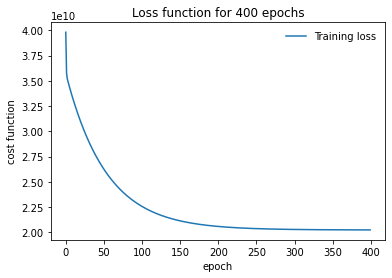

In [ ]:
plt.plot(J, label='Training loss')
plt.xlabel('epoch')
plt.ylabel('cost function')
plt.legend(frameon=False)
plt.title(f"Loss function for {epoch} epochs")
plt.show()

In [ ]:
# set the theta as w_degree3
w_degree3_GD = theta

X_test = transform(data['x1_test'], data['x2_test'], 3)

# calculate y_hat for X_test
y_hat_test = y_hat(X_test, w_degree3_GD)

# Calculate SSE on the Test data
test_loss = loss(data['y_test'], y_hat_test)
print(f'SSE on Test : {test_loss}')

SSE on Test : 11289933996.035786


#### Experiment 2

حال می خواهیم آزمایش کنیم که با 250 ایپاک نتیجه بهتری می گیریم و یا با 400 ایپاک تا بررسی کنیم  بش برازش اتفاق نیفتاده باشد.

In [ ]:
alpha = 0.00000000001
epoch = 250

J, theta = gradient_descent1(X_train, data['y'], w_degree3, alpha, epoch)

loss functon : iter 0 ==> 39817836103.27098
loss functon : iter 1 ==> 35747972375.60405
loss functon : iter 2 ==> 35196388970.36165
loss functon : iter 3 ==> 34896991533.48916
loss functon : iter 4 ==> 34620209897.15484
loss functon : iter 5 ==> 34349822406.27896
loss functon : iter 6 ==> 34084599040.560146
loss functon : iter 7 ==> 33824364791.06682
loss functon : iter 8 ==> 33569020438.62699
loss functon : iter 9 ==> 33318473722.263306
loss functon : iter 10 ==> 33072634472.388603
loss functon : iter 11 ==> 32831414238.753883
loss functon : iter 12 ==> 32594726234.76424
loss functon : iter 13 ==> 32362485304.577858
loss functon : iter 14 ==> 32134607892.350487
loss functon : iter 15 ==> 31911012012.16502
loss functon : iter 16 ==> 31691617218.5337
loss functon : iter 17 ==> 31476344577.454964
loss functon : iter 18 ==> 31265116638.01426
loss functon : iter 19 ==> 31057857404.518368
loss functon : iter 20 ==> 30854492309.153328
loss functon : iter 21 ==> 30654948185.156075
loss functo

In [ ]:
print(f'SSE on Train : {J[-1]}')

SSE on Train : 20371732199.60151


خطای داده ی آموزشی که در نهایت بهش می رسیم بیشتر از حالت قبل با 400 ایپاک است.

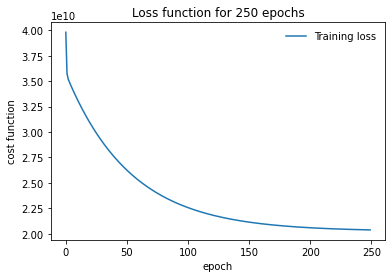

In [ ]:
plt.plot(J, label='Training loss')
plt.xlabel('epoch')
plt.ylabel('cost function')
plt.legend(frameon=False)
plt.title(f"Loss function for {epoch} epochs")
plt.show()

In [ ]:
theta

array([[ 2.24071287],
       [ 1.91513302],
       [-0.95855516],
       [ 1.39087882],
       [ 0.03603183],
       [ 3.62212221],
       [ 1.08194862]])

اما طبق محاسبات زیر خطا روی داده های تست برای 250 ایپاک کمتر از خطا برای 400 ایپاک است و این به این معنی است که با 400 ایپاک به سمت بیش برازش داشتیم می رفتیم و منحنی داشت خیلی خوب روی داده های آموزشی فیت میشد اما روی داده های تست عملکرد خوبی نداشت. پس تعداد تکرار مناسب در اینجا 250 می باشد.

In [ ]:
# set the theta as w_degree3
w_degree3_GD = theta

X_test = transform(data['x1_test'], data['x2_test'], 3)

# calculate y_hat for X_test
y_hat_test = y_hat(X_test, w_degree3_GD)

# Calculate SSE on the Test data
test_loss = loss(data['y_test'], y_hat_test)
print(f'SSE on Test : {test_loss}')

SSE on Test : 11266546807.59792


#### Experiment 3

حال برای اطمینان بیشتر ایپاک را روی 300 نیز تنظیم می کنیم تا هطا روی داده تست و ترین رو محاسبه کنیم.
 مشاهده می کنیم که نتایح روی 300 ایپاک بهتر از 250 نیز هست . یعنی خطا روی داده  آموزشی کاهش می یابد همچنین خطا روی داده تست نیز کاهش میابدو اما بیشتر از 300 مثلا 350 دیگر خوب نیست چون داره داریم داده آموزشی رو خوب یاد می گیریم اما داده ی تست رو نه.

 

In [ ]:
alpha = 0.00000000001
epoch = 300

J, theta = gradient_descent1(X_train, data['y'], w_degree3, alpha, epoch)

loss functon : iter 0 ==> 39817836103.27098
loss functon : iter 1 ==> 35747972375.60405
loss functon : iter 2 ==> 35196388970.36165
loss functon : iter 3 ==> 34896991533.48916
loss functon : iter 4 ==> 34620209897.15484
loss functon : iter 5 ==> 34349822406.27896
loss functon : iter 6 ==> 34084599040.560146
loss functon : iter 7 ==> 33824364791.06682
loss functon : iter 8 ==> 33569020438.62699
loss functon : iter 9 ==> 33318473722.263306
loss functon : iter 10 ==> 33072634472.388603
loss functon : iter 11 ==> 32831414238.753883
loss functon : iter 12 ==> 32594726234.76424
loss functon : iter 13 ==> 32362485304.577858
loss functon : iter 14 ==> 32134607892.350487
loss functon : iter 15 ==> 31911012012.16502
loss functon : iter 16 ==> 31691617218.5337
loss functon : iter 17 ==> 31476344577.454964
loss functon : iter 18 ==> 31265116638.01426
loss functon : iter 19 ==> 31057857404.518368
loss functon : iter 20 ==> 30854492309.153328
loss functon : iter 21 ==> 30654948185.156075
loss functo

In [ ]:
print(f'SSE on Train : {J[-1]}')

SSE on Train : 20287099234.786636


In [ ]:
theta

array([[ 2.23991203],
       [ 1.91698387],
       [-0.9591724 ],
       [ 1.41085409],
       [ 0.04403957],
       [ 3.76470835],
       [ 1.0735133 ]])

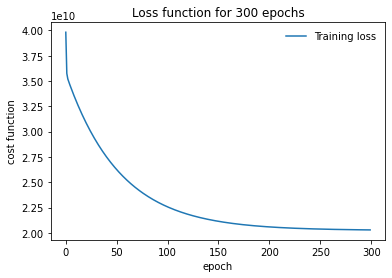

In [ ]:
plt.plot(J, label='Training loss')
plt.xlabel('epoch')
plt.ylabel('cost function')
plt.legend(frameon=False)
plt.title(f"Loss function for {epoch} epochs")
plt.show()

In [ ]:
theta

array([[ 2.23904486],
       [ 1.91815325],
       [-0.96013199],
       [ 1.42472952],
       [ 0.05029336],
       [ 3.85324812],
       [ 1.06819189]])

In [ ]:
# set the theta as w_linear
w_degree3_GD = theta

X_test = transform(data['x1_test'], data['x2_test'], 3)

# calculate y_hat for X_test
y_hat_test = y_hat(X_test, w_degree3_GD)

# Calculate SSE on the Test data
test_loss = loss(data['y_test'], y_hat_test)
print(f'SSE on Test : {test_loss}')

SSE on Test : 11263530024.108376


پس طبق آزمایش انجام شده برای معادله درجه 3 رگرسیون، از بین نرخ یادگیری های زیر و ایپاک های زیر، نرخ یادگیری 0.0000000001 و ایپاک 300 بهترین است.

alpha = [0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001, ..., 0.00000000001]

epoch = [100, 200, 250, 300, 400]

**این واگرایی ای که در معادله ی درجه یک و درجه سه رخ داده بخش زیادی به علت نرمال نبودن داده ها است. زیرا اگر داده  ها نرمال باشند داده های ما کوچک تر می شوند و با گرادیان کاهشی همگرا می شوند**






#### Expriment 4


این آزمایش را با گرادیان کاهشی با شرط توقف خطا انجام می دهیم.
همانطور که در شکل زیر میبینیم این حلقه4751469 بار اجرا می شود ولی چون نرخ یادگیری را خیلی کوچک انتخاب کردیم که مدل واگرا نشود هنوز هم به تعداد ایپاک های بیشتری نیاز هست تا خطای ما به خطایی که با معادله نرمال بدست آوریم نزدیک بشود.
این تعداد تکرار 24 دقیقه طول کشید !!!

در واقع با توجه به این که تابع خطا نسبت به ضریب (دابل یو ها)  از محدب است بنابراین همواره باید مقدار خطا همگرا شود به مقدار بهینه اما اینکه با چند تکرار، به مقدار وزن انتخابی اولیه و نرخ یادگیری بستگی دارد.

In [ ]:
alpha = 0.00000000001

J, theta = gradient_descent2(X_train, data['y'], w_degree3, alpha)

Streaming output truncated to the last 5000 lines.
loss functon : iter 4746469 ==> 18118483463.068054
loss functon : iter 4746470 ==> 18118483185.939194
loss functon : iter 4746471 ==> 18118482908.81038
loss functon : iter 4746472 ==> 18118482631.68161
loss functon : iter 4746473 ==> 18118482354.55288
loss functon : iter 4746474 ==> 18118482077.4242
loss functon : iter 4746475 ==> 18118481800.295563
loss functon : iter 4746476 ==> 18118481523.16697
loss functon : iter 4746477 ==> 18118481246.03842
loss functon : iter 4746478 ==> 18118480968.90992
loss functon : iter 4746479 ==> 18118480691.781464
loss functon : iter 4746480 ==> 18118480414.653046
loss functon : iter 4746481 ==> 18118480137.52468
loss functon : iter 4746482 ==> 18118479860.396355
loss functon : iter 4746483 ==> 18118479583.268074
loss functon : iter 4746484 ==> 18118479306.13984
loss functon : iter 4746485 ==> 18118479029.01165
loss functon : iter 4746486 ==> 18118478751.883503
loss functon : iter 4746487 ==> 1811847847

KeyboardInterrupt: ignored

با توجه به اینکه برنامه خیلی طول کشید و این سل را متوقف کردم مقداری برای تاریخچه ی مقادیر خطا ذخیره نشد.

In [ ]:
print(f'SSE on Train : {J[-1]}')

In [ ]:
theta

In [ ]:
# set the theta as w_linear
w_degree3_GD = theta

X_test = transform(data['x1_test'], data['x2_test'], 3)

# calculate y_hat for X_test
y_hat_test = y_hat(X_test, w_degree3_GD)

# Calculate SSE on the Test data
test_loss = loss(data['y_test'], y_hat_test)
print(f'SSE on Test : {test_loss}')

### Polynomial degree 5

In [ ]:
# Initialize w_degree5 on normal distribution. we need 11 coefficients.
w_degree5 = np.random.normal(0, 1, 11)

print(f'w_degree5 shape : {w_degree5.shape}')
print(f'w_degree5 with GD : {w_degree5}')

w_degree5 shape : (11,)
w_degree5 with GD : [ 2.2408932   1.86755799 -0.97727788  0.95008842 -0.15135721 -0.10321885
  0.4105985   0.14404357  1.45427351  0.76103773  0.12167502]


در مدل درجه 5 به شدت واگرا می شود به طوری که نرخ یادگیری را از 0.01 تا 10 به توان منفی 15 امتحان کردیم مدل به شدت واگرا بود به طوری که در ایپاک های قبل از 100 تکرار خطای مدل بی نهایت میشد. برای جلوگیری از این کار و همگرا شدن مدل باید نرخ یادگیری را به شدت کاهش دهیم که در اینجا ما 10 به توان منفی 16 را انتخاب کردیم.
در عوض چون نرخ یادگیری به شدت کم است یادگیری مدل نیز کم می شود بنابراین لازم است تا گرادیان کاهشی را روی مدل به تکرار زیادی انجام دهیم تا خطا کاهش پیدا کند. برای مثال با نرخ یادگیری 10 به توان منفی 16 و وزن اولیه ای که در بالا در نظر گرفتیم با 500 تکرار از یک عدد 14 رقمی خطا به یک عدد 13 رقمی کاهش پیدا کرده که مقدار خیلی زیادی است و باید خیلی این حلقه ادامه پیدا کند تا خطا کم شود.

اگر داده ها نرمال بودند و این قدر مقادیر داده ها بزرگ نبودند، مدل همگرا بود.

In [ ]:
X_train = transform(data['x1'], data['x2'], 5)
w_degree5 = w_degree5.reshape(-1, 1)

alpha = 0.0000000000000001
epoch = 40000

In [ ]:
J, theta = gradient_descent1(X_train, data['y'], w_degree5, alpha, epoch)

Streaming output truncated to the last 5000 lines.
loss functon : iter 35000 ==> 98222868021.26572
loss functon : iter 35001 ==> 98219601872.13564
loss functon : iter 35002 ==> 98216335862.43384
loss functon : iter 35003 ==> 98213069992.15442
loss functon : iter 35004 ==> 98209804261.29138
loss functon : iter 35005 ==> 98206538669.83878
loss functon : iter 35006 ==> 98203273217.79068
loss functon : iter 35007 ==> 98200007905.14114
loss functon : iter 35008 ==> 98196742731.88419
loss functon : iter 35009 ==> 98193477698.0139
loss functon : iter 35010 ==> 98190212803.52429
loss functon : iter 35011 ==> 98186948048.40945
loss functon : iter 35012 ==> 98183683432.66336
loss functon : iter 35013 ==> 98180418956.28014
loss functon : iter 35014 ==> 98177154619.2538
loss functon : iter 35015 ==> 98173890421.5784
loss functon : iter 35016 ==> 98170626363.248
loss functon : iter 35017 ==> 98167362444.25662
loss functon : iter 35018 ==> 98164098664.59836
loss functon : iter 35019 ==> 98160835024.

In [ ]:
theta 

array([[ 2.2408213 ],
       [ 1.86729083],
       [-0.9780809 ],
       [ 0.948514  ],
       [-0.16044132],
       [-0.11451167],
       [ 0.31549665],
       [ 0.05460042],
       [ 0.68340684],
       [ 0.01176268],
       [-0.0348589 ]])

الان ما گرادیان کاهشی را برای 4000 بار با نرخ یادگیری که در بالا ست کردیم انجام دادیم خطا نسبت به مقدار اولیه کاهش پیدا کرده اما همچنان خیلی زیاد است و تفاوت زیادی با خطایی که در فرم بسته داشتیم دارد. پس هنوز به ایپاک های بیشتری برای کاهش نیاز دارد.

می توان از گرادیان کاهشی با شرط توقف خطا نیز استفاده کرد اما با توجه به اینکه داده ها نرمال نیستند ومدل به شدت واگرا است پس باید نرخ یادگیری کوچک باشد پس تعداد ایپاک بیشتری نیاز دارد و خیلی طول می کشد. حتی بیشتر از زمان لازم برای مدل درجه 3 . 

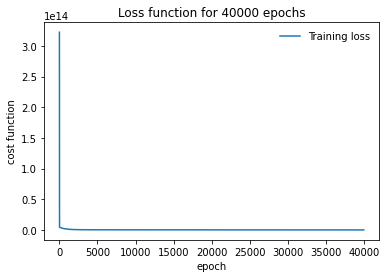

In [ ]:
plt.plot(J, label='Training loss')
plt.xlabel('epoch')
plt.ylabel('cost function')
plt.legend(frameon=False)
plt.title(f"Loss function for {epoch} epochs")
plt.show()

In [ ]:
# set the theta as w_degree5
w_degree5_GD = theta

X_test = transform(data['x1_test'], data['x2_test'], 5)

# calculate y_hat for X_test
y_hat_test = y_hat(X_test, w_degree5_GD)

# Calculate SSE on the Test data
test_loss = loss(data['y_test'], y_hat_test)
print(f'SSE on Test : {test_loss}')

SSE on Test : 102704422808.80145


## Regression with Regularization and KFold Cross Validation

در این قسمت می خواهیم تا جمله ی منظم ساز را نیز به عبارت خطا اضافه کنیم تا مدل تشویق شود تا ساده باشد و ضرایب بزرگی را انتخاب نکند. برای محاسبه بردار ضرایب در این قسمت هم می توان از گرادیان کاهشی استفاده کرد و هم از فرم بسته رگرسیون، که من از فرم بسته رگرسیون استفاده می کنم. 
در واقع کاری که باید در این مرحله انجام شوداین است که از بین لامبدا ها (ضریب عبارت منظم ساز) لامبدای مناسب را برای هر مدل انتخاب کنیم. برای انتخاب بهترین لامبدا از روش کراس ولیدیشن استفاده می کنیم.
این روش برای انتخاب بهترین پارامتر استفاده شود. به این صورت که داده ها را به 5 قسمت تقسیم می کند و هر بار یکی را به عنوان داده اعتبار سنجی در نظر می گیرد. با این کار در نهایت 5 خطا از 5 مدل بدست می آید که مامیانگین آن ها را در نظر می گیریم و با مقایسه این مقدار برای مقادیر مختلف لامبدا،، لامبدایی در نهایت انتخاب می شود که خطای اعتبار سنجی کمتری داشته باشد.

در واقع چرخه کراس ولیدیشن به صورت زیر است:

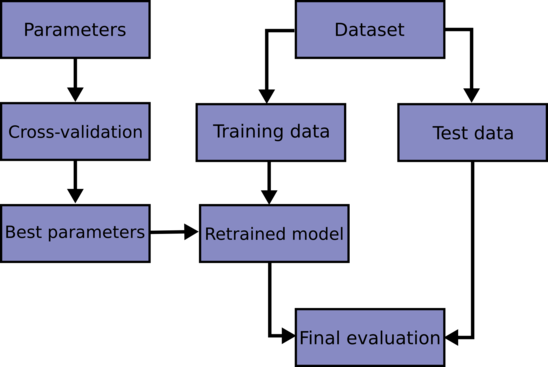

In [ ]:
def find_theta_regulariztion(X, y, L):
  '''calculate theta based on Normal Equation with regularization.'''
      
  # reshaping y to (n,1)
  y = y.reshape(-1,1)

  identity_matirx = np.identity(X.shape[1])
    
  # The Normal Equation
  theta = np.dot(np.linalg.inv(np.dot(X.T, X) + L*identity_matirx), np.dot(X.T, y))
    
  return theta

در ابتدای کراس ولیدیشن حتما باید داده ها را شافل کنیم.

In [ ]:
def unison_shuffled(a, b):
  '''calculate shuffle of two array simultaneously'''

  assert len(a) == len(b)
  p = np.random.permutation(len(a))
  return a[p], b[p]

In [ ]:
def KfoldCV(X, y, L):
  '''Execute K fold cross validation (k =5) on train set.
  Then return average of validation errors.
  '''
  # cost function on validation set in cross validation
  J_cv = 0

  X_shuffle, y_shuffle = unison_shuffled(X, y)

  # number of dataset
  n = X_shuffle.shape[0]

  for i in range(0, 5): # 5 fold cross validation

    # select validation set from 5 fold
    X_valid = X_shuffle[(int(n/5)*i): (int(n/5)*(i+1))]
    y_valid = y_shuffle[(int(n/5)*i): (int(n/5)*(i+1))]

    # print([(n/5)*i, (n/5)*(i+1)])
    
    # remove validation set from X and set train set
    X_train = np.delete(X_shuffle, np.arange((int(n/5)*i), (int(n/5)*(i+1))), axis=0)
    y_train = np.delete(y_shuffle, np.arange((int(n/5)*i), (int(n/5)*(i+1))), axis=0)

    # print(len(X_train),len(y_train))
    # calculate w_hat base on normal equation and regularization term
    w_hat = find_theta_regulariztion(X_train, y_train, L)

    y_hat_valid = y_hat(X_valid, w_hat)
    
    J_cv += loss(y_valid, y_hat_valid)


  return J_cv/5

### Linear Regression

In [ ]:
Lambda = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [ ]:
X_train = transform(data['x1'], data['x2'], 1)

cost_value = []

for i in Lambda:
  cost_value.append(KfoldCV(X_train, data['y'], i))

ما در کد بالا الگوریتم کراس ولیدیشن  را برای 9 مقدار لامبدایی که داشتیم اجرا کردم. در هر بار خطایی به ما داده میشود که مااین خطاها را در لیست ذخیره می کنیم تا در نمودار بتوان خطا ها را روی مقادیر مختلف لامبدا مقایسه کرد.

طبق نمودار زیر انتخاب لامبدا مساوی با 0.0001 مناسب ترین انتخاب برای مدل با درجه یک است. زیرا خطای آن با روش کراس ولیدیشن، روی داده های ولیدیشن  نسبت به بقیه لامبدا ها کمتر است. پس الان کراس ولیدیشن در انتخاب بهترین پارامتر به ما کمک کرد.


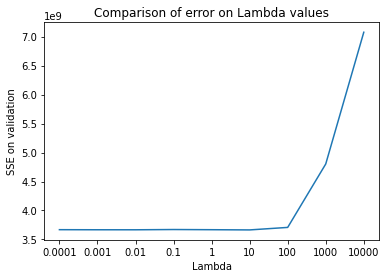

In [ ]:
default_x_ticks = range(len(Lambda))
plt.plot(default_x_ticks, cost_value)
plt.xticks(default_x_ticks, Lambda)
plt.xlabel("Lambda")
plt.ylabel("SSE on validation")
plt.title("Comparison of error on Lambda values")
plt.show()

In [ ]:
len(cost_value)

9

حالا که بهترین مقدار لامبدا بدست اومد از اون برای محاسبه بردار ضرایب استفاده می کنیم و مدل درجه یک را میسازیم. سپس خطا را اروی داده های آموزشی و تست بدست می آوریم.

In [ ]:
w_linear = find_theta_regulariztion(X_train, data['y'], 0.0001) 
print(f'w for linear regression : \n{w_linear}')

w for linear regression : 
[[-4226.06966707]
 [  537.30124021]
 [  446.63580786]]


In [ ]:
y_hat_train = y_hat(X_train, w_linear)
train_loss = loss(data['y'], y_hat_train)
print(f'SSE on Train : {train_loss}')

SSE on Train : 18317759690.368134


وقتی مقادیر خطا برای داده های آموزشی و تست را با این مقادیر در روش بدون استفاده از منظم ساز مقایسه می کنیم می بینیم که خطا روی داده های آموزشی و تست در صورتی که از منظم ساز استفاده کنیم کمی بیشتر است. این احتمالا به این دلیل است که مدل ما به اندازه کافی نسبت به مدل اصلی که داده از روی آن ساخته شده ساده هست و اگر جمله منظم ساز استفاده شود باعث می شود کمتر به سمت فیت شدن روی داده های آموزشی برود.
پس برای مدل درجه یک اگر از منظم ساز استفاده نکنیم بهتر است.

In [ ]:
X_test = transform(data['x1_test'], data['x2_test'], 1)
y_hat_test = y_hat(X_test, w_linear)

# calculate SSE (Sum of Squared Error) on the Test data
test_loss = loss(data['y_test'], y_hat_test)
print(f'SSE on Test : {test_loss}')

SSE on Test : 12944760583.086916


### Polynomial Regression degree 3

In [ ]:
# create dataset and its featues for degree 3 polynomial
X_train = transform(data['x1'], data['x2'], 3)

cost_value = []

for i in Lambda:
  cost_value.append(KfoldCV(X_train, data['y'], i))

همانطور که در شکل زیر می بینیم با افزایش مقدار لامبدا خطا تا یک جایی کاهش پیدا کرده و از لامبدا برایر با 10 مقدار خطا روی داده های اعتبار سنجی افزایش پیدا کرده. پس در این مدل انتخاب لامبدای 1 بهترین گزینه است. پس همین لامبدا را انتخاب می کنیم و مدل را آموزش می دهیم. 

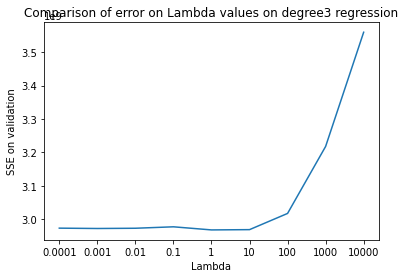

In [ ]:
default_x_ticks = range(len(Lambda))
plt.plot(default_x_ticks, cost_value)
plt.xticks(default_x_ticks, Lambda)
plt.xlabel("Lambda")
plt.ylabel("SSE on validation")
plt.title("Comparison of error on Lambda values on degree3 regression")
plt.show()

In [ ]:
print(f'cost values on degree 3 model: \n{cost_value}')

cost values on degree 3 model: 
[2973331122.169543, 2972296427.380429, 2973029287.1459556, 2977354777.2915163, 2968046001.78843, 2968883122.596544, 3017373522.2811594, 3217845155.932776, 3559716979.886533]


In [ ]:
w_degree3 = find_theta_regulariztion(X_train, data['y'], 1) 
print(f'w for degree 3 regression : \n{w_degree3}')

w for degree 3 regression : 
[[-2.78364264e+03]
 [ 5.35421631e+02]
 [ 5.30688936e+01]
 [-2.04539685e+00]
 [ 1.55794025e+01]
 [ 1.91856063e-01]
 [ 2.24237808e-01]]


با مقایسه ی خطای آموزشی و تست بدست آمده در روش با جمله منظم ساز با مدل با همین درجه بدون منظم ساز می بینیم که خطای آموزشی و تست با منظم ساز بیشتر شده نسبت به روش قبل (خطای آموزشی در اینجا نسبت به قبلل به اندازه 36 میلیون بیشتر شده). پس در مدل درجه 3 استفاده نکردن از جمله منظم ساز بهتر است و خطای کمتری خواهیم داشت. و دلیل این کار هم به این دلیل است که این جمله منظم ساز با این ضریب باعث می شود مدل به اصطلاح آتل بندی شود و نتواند خودش رو روی داده های اصلی تطبیق بدهد و آن ها را یاد بگیرد.

In [ ]:
y_hat_train = y_hat(X_train, w_degree3)
train_loss = loss(data['y'], y_hat_train)
print(f'SSE on Train : {train_loss}')

SSE on Train : 14817897426.228828


In [ ]:
X_test = transform(data['x1_test'], data['x2_test'], 3)
y_hat_test = y_hat(X_test, w_degree3)

# calculate SSE (Sum of Squared Error) on the Test data
test_loss = loss(data['y_test'], y_hat_test)
print(f'SSE on Test : {test_loss}')

SSE on Test : 9758836037.898756


### Polynomial Regression degree 5

In [ ]:
# create dataset and its featues for degree 5 polynomial
X_train = transform(data['x1'], data['x2'], 5)

cost_value = []

for i in Lambda:
  cost_value.append(KfoldCV(X_train, data['y'], i))

همانطور که در شکل زیر می بینیم در مدل درجه 5 بهترین انتخاب لامبدا 0.0001 است زیرا خطا با این لامبدا از بقیه کمتر است.

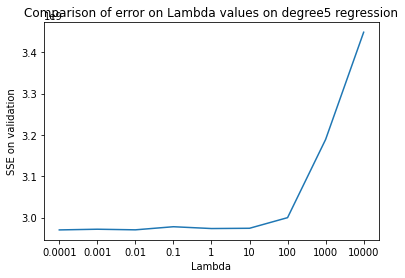

In [ ]:
default_x_ticks = range(len(Lambda))
plt.plot(default_x_ticks, cost_value)
plt.xticks(default_x_ticks, Lambda)
plt.xlabel("Lambda")
plt.ylabel("SSE on validation")
plt.title("Comparison of error on Lambda values on degree5 regression")
plt.show()

In [ ]:
Lambda.index(min(Lambda))

0

In [ ]:
print(f'cost values on degree 5 model: \n{cost_value}')

cost values on degree 5 model: 
[2970190431.285209, 2971866939.725148, 2970398126.549262, 2977904815.1898127, 2973525695.0444946, 2974167045.2722793, 2999877620.2006826, 3189083131.1514044, 3448610511.6655264]


In [ ]:
w_degree5 = find_theta_regulariztion(X_train, data['y'], 0.0001) 
print(f'w for degree 5 regression : \n{w_degree5}')

w for degree 5 regression : 
[[-2.61174405e+03]
 [ 4.70892010e+02]
 [-6.93869039e+01]
 [ 1.95489047e+00]
 [ 4.25682214e+01]
 [ 7.47786110e+00]
 [-1.76840536e+00]
 [-1.55737986e+00]
 [ 4.14224341e-02]
 [ 8.60624638e-02]
 [ 3.04879143e-04]]


در این روش نیز خطاهای بدست آمده در این مرحله نسبت به روش بدون منظم ساز کمی بیشتر است در حد 0.0008. یعنی خطاهایی که با روش منظم ساز بدست آمده اند خیلی کم بیشتر از روش بدون منظم ساز و این به معنی آن است که هرچه درجه مدل بالاتر رود استفاده از منظم ساز معقول تر است. برای مثال در رگرسیون های درجه یک و درجه 3 چون مدل ساده است و پیچیدگی ندارد لزومی به استفاده از منظم ساز نیست زیرا مدل را بیش از حد ساده می کند و باعث می شود مدل داده ها را به خوبی یاد نگیردو خطا روی داده های آموزشی خیلی بیشتر شود. اما در مدل های درجه بالاتر چون پیچیدگی مدل بالاتر می رود احتمال بیش برازش و حفظ کردن داده ها وجود دارد از منظم ساز استفاده می شود تا به سمت حفظ کردن و بیش برازش نرود.

In [ ]:
y_hat_train = y_hat(X_train, w_degree5)
train_loss = loss(data['y'], y_hat_train)
print(f'SSE on Train : {train_loss}')

SSE on Train : 14796048788.338896


In [ ]:
X_test = transform(data['x1_test'], data['x2_test'], 5)
y_hat_test = y_hat(X_test, w_degree5)

# calculate SSE (Sum of Squared Error) on the Test data
test_loss = loss(data['y_test'], y_hat_test)
print(f'SSE on Test : {test_loss}')

SSE on Test : 9201144915.303053


### Model Comparision

In [ ]:
train_loss = [18317759690.368134,14817897426.228828,14796048788.338896]
test_loss = [12944760583.086916,9758836037.898756,9201144915.303053]
regressor = ['linear', 'degree3', 'degree5']

طبق شکل های زیر مدل با درجه 5 برای این داده ها بهترین است زیرا هم خطا آن روی داده های آموزشی و هم تست نسبت به بقیه مدل ها کمتر است و هم نسبت به بقیه تعمیم بهتری دارد. در واقع مدل با درجه 5 داده ها را بهتر از بقیه یاد گرفته است.

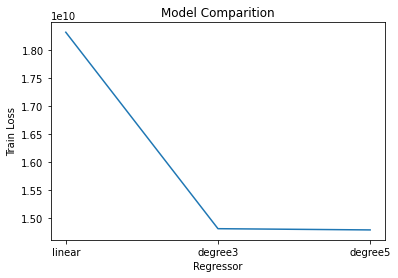

In [ ]:
plt.plot(regressor ,train_loss)
plt.xlabel('Regressor')
plt.ylabel('Train Loss')
plt.title("Model Comparition")
plt.show()

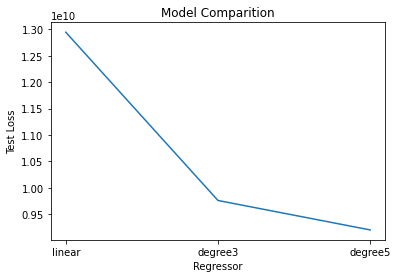

In [ ]:
plt.plot(regressor ,test_loss)
plt.xlabel('Regressor')
plt.ylabel('Test Loss')
plt.title("Model Comparition")
plt.show()

**نتیجه:**


> هر چقدر درجه مدل بیشتر بشود مدل پیچیده تر می شود و توانایی یادگیری آن بیشتر می شود بنابراین داده ها را بهتر یاد می گیرد. البته به این نکته هم باید توجه کرد که اگر پیچیدگی از یک حدی بیشتر شود مدل امکان حفظ کردن داده ها و بیش برازش را دارد. پس انتخاب پیچیدگی مدل باید با توجه به داده های ما باشد. 
برای مثال در این تمرین رگرسور با درجه 5 بهتر از بقیه عمل می کند. زیرا داده ها را بهتر یاد گرفته بنابراین خطا روی داده  آموزشی و تست نسبت به بقیه مدل ها کمتر است.


> استفاده از عبارت منظم ساز لزوما به بهبود مدل کمک نمی کند.برای مثال در اینجا مدل های درجه یک و درجه سه (بدون در نظر گرفتن روابط بین متغیرها) ساده تر از داده های ما هستند و اعمال منظم ساز باعث افزایش خطای آن ها روی داده های اموزشی و 
تست می شود
زیرا در این حالت مدل را خیلی محدود می کنیم و نمی تواند داده ها را به خوبی یاد بگیرد. در مدل درجه 5 که به پیچیدگی داده ها نزدیک تر است باز هم اعمال منظم ساز باعث افزایش خطا می شود اما افزایش خیلی خیلی کمتر از درجه یک و سه است.

بنابراین اعمال جمله منظم ساز برای مدل های با درجه بالاتر معقول است و مقدار لامبدا باید طوری باشد که مدل را زیاد محدود نکند در واقع انتخاب لامبداهای کوچکتر معمولا بهتره. 
ما در اینجا برای انتخاب مقدار مناسب برای لامبدا از کراس ولیدیشن استفاده کردیم به این صورت که لامبدایی برای هر مدل انتخای می شود که خطای کراس ولیدیشن آن کمتر باشد.

هر چقدر درجه  مدل بالاتر باشد در گرادیان کاهشی نیاز است تا نرخ یادگیری را خیلی کوچک در نظر بگیریم تا مقدار خطا واگرا نشود. با کاهش مقدار نرخ یادگیری تعداد تکرار ها هم باید افزایش پیدا بکند.



